In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("student-mat.csv", sep = ";")
df = df.loc[:, ['G1', 'G2', 'G3']]
df.head(3)

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 3 columns):
G1    395 non-null int64
G2    395 non-null int64
G3    395 non-null int64
dtypes: int64(3)
memory usage: 9.4 KB


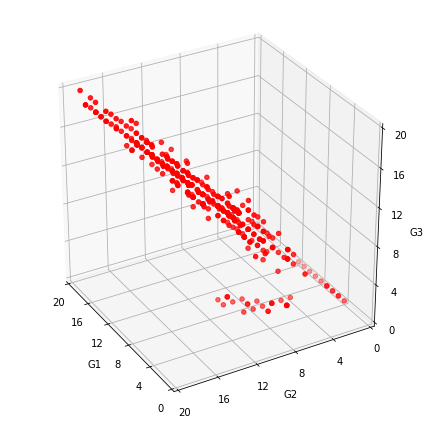

In [4]:
X = df.loc[:, ['G1', 'G2']].values
y = df.loc[:, 'G3'].values

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (6, 6))
ax  = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], y, color = "red", marker = "o")

ax.set_xlim3d(0, 20)
ax.set_ylim3d(0, 20)
ax.set_zlim3d(0, 20)

ticks = np.arange(0, 24, 4)
ax.xaxis.set(ticks = ticks)
ax.yaxis.set(ticks = ticks)
ax.zaxis.set(ticks = ticks)

ax.set_xlabel("G1")
ax.set_ylabel("G2")
ax.set_zlabel("G3")

ax.view_init(30, 150)

plt.tight_layout()
plt.show()

In [5]:
# Raw implementation
class LinearRegression:
    """
    Linear Regression Algorithm
    """
    def __ini__(self):
        pass
    
    def fit(self, X, y):
        Z = np.array([1 for x in np.arange(X.shape[0])])
        X = np.c_[Z, X] # create an array by including each component as a column
        X_dagger = np.linalg.pinv(X) # find the pseudo-inverse matrix
        self.w_  = np.dot(X_dagger, y) 
        return self
    
    def predict(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

In [6]:
my_regression = LinearRegression()
my_regression.fit(X, y)
print("Weights vector: {}.".format(my_regression.w_))

Weights vector: [-1.83001214  0.15326859  0.98686684].


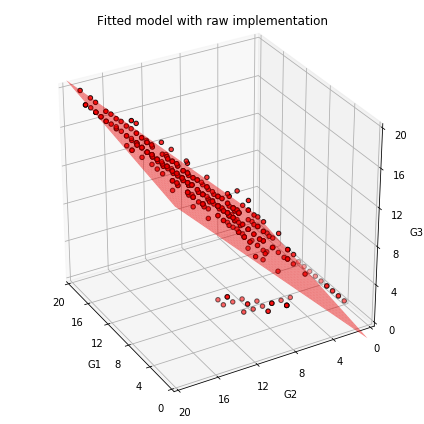

In [7]:
g1 = np.arange(0, 20, 0.1)
g2 = np.arange(0, 20, 0.1)
g1, g2 = np.meshgrid(g1, g2)
g3 = my_regression.predict(np.c_[np.ravel(g1), np.ravel(g2)])
g3 = g3.reshape(g1.shape)

fig = plt.figure(figsize = (6, 6))
ax  = fig.add_subplot(111, projection = '3d')
ax.plot_surface(g1, g2, g3, color = "red", alpha = 0.5)
ax.scatter(X[:, 0], X[:, 1], y, color = "red", marker = "o", edgecolor = "black")

ax.set_xlim3d(0, 20)
ax.set_ylim3d(0, 20)
ax.set_zlim3d(0, 20)

ticks = np.arange(0, 24, 4)
ax.xaxis.set(ticks = ticks)
ax.yaxis.set(ticks = ticks)
ax.zaxis.set(ticks = ticks)

ax.set_title("Fitted model with raw implementation", pad = 15)
ax.set_xlabel("G1")
ax.set_ylabel("G2")
ax.set_zlabel("G3")

ax.view_init(30, 150)
# ax.invert_xaxis()

plt.tight_layout()
plt.show()

In [8]:
# Sklearn usage
from sklearn.linear_model import LinearRegression

sklearn_regression = LinearRegression()
sklearn_regression.fit(X, y)

print("Weights vector - intercept: {} & coefficients: {}.".format(sklearn_regression.intercept_, sklearn_regression.coef_))

Weights vector - intercept: -1.8300121405807381 & coefficients: [0.15326859 0.98686684].
